## Plate Detection

### Data Exploration

In [2]:
import pandas as pd
detect_df = pd.read_csv("data/Licplatesdetection_train.csv")
detect_df.head()

,img_id,ymin,xmin,ymax,xmax
0,1.jpg,276,94,326,169
1,10.jpg,311,395,344,444
2,100.jpg,406,263,450,434
3,101.jpg,283,363,315,494
4,102.jpg,139,42,280,222


In [3]:
detect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   ymin    900 non-null    int64 
 2   xmin    900 non-null    int64 
 3   ymax    900 non-null    int64 
 4   xmax    900 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 35.3+ KB


In [4]:
!wget "https://raw.githubusercontent.com/SirajuddinShaik/helper/main/helper_functions.py"

--2024-12-13 15:19:24--  https://raw.githubusercontent.com/SirajuddinShaik/helper/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7691 (7.5K) [text/plain]
Saving to: ‘helper_functions.py.7’

helper_functions.py 100%[===================>]   7.51K  --.-KB/s    in 0.001s  

2024-12-13 15:19:24 (11.7 MB/s) - ‘helper_functions.py.7’ saved [7691/7691]



In [5]:
len(detect_df)

900

In [ ]:
from helper_functions import unzip_data
unzip_data("data/Licplatesdetection_train.zip")

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import random

def display_random_image(image_schema):
    r = random.randint(0,900)
    path = image_schema.format(num=r)
    img = Image.open(path)
    plt.title(path.split('/')[-1])
    plt.imshow(img)
    plt.axis('off')
    plt.show()
image_schema = "data/license_plates_detection_train/{num}.jpg"


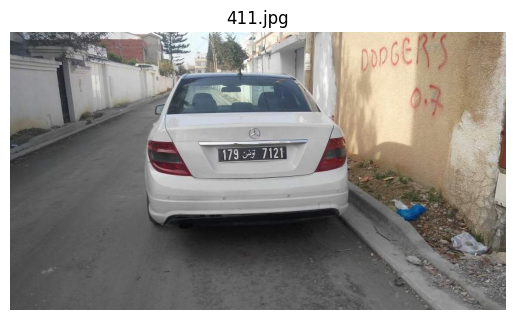

In [7]:
display_random_image(image_schema)

### Image detection using Yolo 5 (for Fast Inferencing)

In [8]:
!git clone "https://github.com/ultralytics/yolov5.git"
!pip install -r yolov5/requirements.txt -q


fatal: destination path 'yolov5' already exists and is not an empty directory.


⚡️ Tip	Check organization access: https://github.com/settings/connections/applications/c7457225b242a94d60c6



In [9]:
# data format for yolo <class_id> <x_center> <y_center> <width> <height>

# directory format
# yolov5/dataset/
#         images/
#             train/
#             val/
#             test/
#         labels/
#             train/
#             val/
#             test/

# copy all the images to yolov5/dataset/train

In [10]:
import os

#Funcrion to create the dir_structure
def create_dir_structure(base_path):
    """
    Creates the following directory structure:
    
    base_path/
        images/
            train/
            val/
            test/
        labels/
            train/
            val/
            test/
    
    Parameters:
        base_path (str): The base directory where the structure should be created.
    """
    # Define the directory structure
    dir_structure = [
        os.path.join(base_path, "images/train"),
        os.path.join(base_path, "images/val"),
        os.path.join(base_path, "images/test"),
        os.path.join(base_path, "labels/train"),
        os.path.join(base_path, "labels/val"),
        os.path.join(base_path, "labels/test"),
    ]

    # Create each directory if it doesn't exist
    for directory in dir_structure:
        try:
            os.makedirs(directory, exist_ok=True)
            print(f"Created or already exists: {directory}")
        except Exception as e:
            print(f"Error creating directory {directory}: {e}")

# Usage Example
# Replace with the path where you want to create the directory structure
base_path = "yolov5/dataset"
create_dir_structure(base_path)


Created or already exists: yolov5/dataset/images/train
Created or already exists: yolov5/dataset/images/val
Created or already exists: yolov5/dataset/images/test
Created or already exists: yolov5/dataset/labels/train
Created or already exists: yolov5/dataset/labels/val
Created or already exists: yolov5/dataset/labels/test


In [12]:
import os
import pandas as pd
from PIL import Image


csv_path = "data/Licplatesdetection_train.csv"
images_path = "yolov5/dataset/images/train"
output_labels_path = "yolov5/dataset/labels/train"


os.makedirs(output_labels_path, exist_ok=True)


df = pd.read_csv(csv_path)


for index, row in df.iterrows():
    
    image_name = row["img_id"]
    class_id = 0
    x_min = row["xmin"]
    y_min = row["ymin"]
    x_max = row["xmax"]
    y_max = row["ymax"]

    
    image_path = os.path.join(images_path, image_name)
    with Image.open(image_path) as img:
        width, height = img.size

    
    x_center = ((x_min + x_max) / 2) / width
    y_center = ((y_min + y_max) / 2) / height
    box_width = (x_max - x_min) / width
    box_height = (y_max - y_min) / height
    
    yolo_annotation = f"{class_id} {x_center} {y_center} {box_width} {box_height}\n"

    
    label_file = os.path.join(output_labels_path, f"{os.path.splitext(image_name)[0]}.txt")
    with open(label_file, "a") as file:
        file.write(yolo_annotation)


create yolov5/data.yaml file
content
```
train: dataset/images/train
val: dataset/images/val
nc: 1
names: ['lic_plate']
```

In [15]:
%cd yolov5

/teamspace/studios/this_studio/datascience assignment
/teamspace/studios/this_studio/datascience assignment/yolov5_old


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [16]:

!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt

2024-12-13 15:23:53.320162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-13 15:23:53.500008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-13 15:23:53.543356: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optim

In [17]:
%cd ..

/teamspace/studios/this_studio/datascience assignment


In [18]:
%cd yolov5_old # trained model

/teamspace/studios/this_studio/datascience assignment/yolov5_old


In [19]:
# evaluate the model
!python val.py --weights runs/train/exp3/weights/best.pt --data data.yaml


val: data=data.yaml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2024-12-3 Python-3.10.14 torch-2.0.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /teamspace/studios/this_studio/datascience assignment/yolov5_old/d
                 Class     Images  Instances          P          R      mAP50   
                   all         40         40      0.996          1      0.995      0.784
Speed: 2.5ms pre-process, 166.5ms inference, 0.5ms NMS per image at shape (32, 3, 640, 640)
Results saved to runs/val/exp2


In [20]:
!pwd

/teamspace/studios/this_studio/datascience assignment/yolov5_old


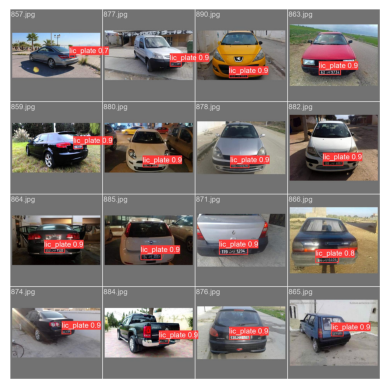

In [21]:
# results
img = Image.open("runs/val/exp3/val_batch0_pred.jpg")

plt.imshow(img)
plt.axis('off') 
plt.show()

In [22]:
#detection on the test data
!python detect.py --weights runs/train/exp3/weights/best.pt --source dataset/images/test/


detect: weights=['runs/train/exp3/weights/best.pt'], source=dataset/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2024-12-3 Python-3.10.14 torch-2.0.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /teamspace/studios/this_studio/datascience assignment/yolov5_old/dataset/images/test/891.jpg: 480x640 1 lic_plate, 137.4ms
image 2/10 /teamspace/studios/this_studio/datascience assignment/yolov5_old/dataset/images/test/892.jpg: 640x480 1 lic_plate, 115.3ms
image 3/10 /teamspace/studios/this_studio/datascience assignment/yolov5_old/d

In [24]:
# from yolov5 import detect
# detect.run(weights='runs/train/exp3/weights/best.pt', source='dataset/images/test/', imgsz=640)

In [25]:
%matplotlib inline

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /teamspace/studios/this_studio/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-3 Python-3.10.14 torch-2.0.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


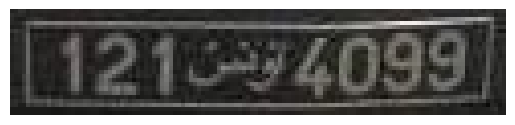

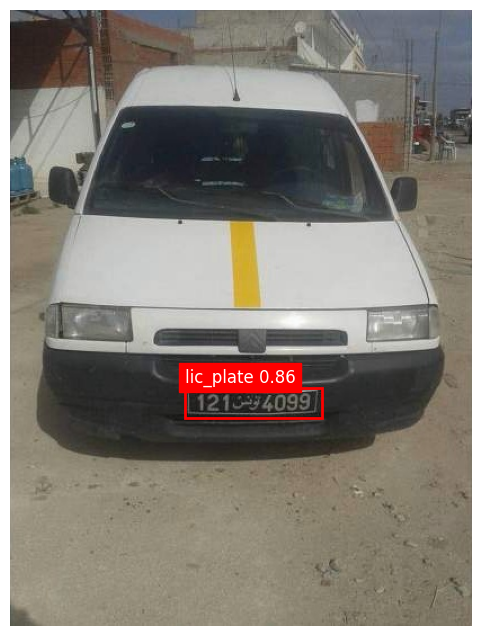

In [26]:
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

def load_model(weights_path: str):
    """
    Load the YOLOv5 model.
    Args:
        weights_path (str): Path to the trained weights file (e.g., best.pt).
    Returns:
        model: Loaded YOLOv5 model.
    """
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path, force_reload=True)
    return model

def predict(model, image_path: str, conf_thresh: float = 0.25):
    """
    Perform predictions on a single image.
    Args:
        model: YOLOv5 model.
        image_path (str): Path to the input image.
        conf_thresh (float): Confidence threshold for predictions.
    Returns:
        results: YOLOv5 predictions.
    """
    # Perform inference
    results = model(image_path)
    return results

def save_cropped_images(results, image_path: str, output_dir: str):
    """
    Crop bounding box regions from the image and save them.
    Args:
        results: YOLOv5 prediction results.
        image_path (str): Path to the input image.
        output_dir (str): Directory to save cropped images.
    """
    # Load the original image
    original_image = Image.open(image_path)
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # Extract bounding boxes and crop the image
    df = results.pandas().xyxy[0]  # Get bounding box coordinates
    for idx, row in df.iterrows():
        x_min, y_min, x_max, y_max = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = row['name']  # Class label

        # Crop the region
        cropped_image = original_image.crop((x_min, y_min, x_max, y_max))

        # Save the cropped region
        output_path = Path(output_dir) / f"{Path(image_path).stem}_crop_{idx}_{label}.jpg"
        cropped_image.save(output_path)
        return output_path

def display_results(results, image_path: str):
    """
    Display the original image with bounding boxes overlaid.
    Args:
        results: YOLOv5 prediction results.
        image_path (str): Path to the input image.
    """
    # Load the original image
    original_image = Image.open(image_path).convert("RGB")

    # Create a Matplotlib figure
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(original_image)

    # Draw bounding boxes
    df = results.pandas().xyxy[0]
    for _, row in df.iterrows():
        x_min, y_min, x_max, y_max = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        label = row['name']
        confidence = row['confidence']

        # Draw rectangle and label
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor="red", facecolor="none", linewidth=2)
        ax.add_patch(rect)
        ax.text(x_min, y_min - 5, f"{label} {confidence:.2f}", color="white", fontsize=12, backgroundcolor="red")

    plt.axis("off")
    plt.show()
    
if __name__ == "__main__":
    # Step 1: Load the model
    model_path = "runs/train/exp3/weights/best.pt"  # Replace with your model path
    model = load_model(model_path)

    # Step 2: Specify the image
    image_path = "dataset/images/test/892.jpg"  # Replace with the image you want to predict

    # Step 3: Perform predictions
    predictions = predict(model, image_path)

    # Step 4: Save cropped images based on bounding boxes
    output_directory = "output_crops"  # Directory to save cropped images
    crop_path = save_cropped_images(predictions, image_path, output_directory)


    # Step 5: Display cropped images
    cropped_image = Image.open(crop_path)
    plt.imshow(cropped_image)
    plt.axis("off")
    plt.show()
    
    # Step 6: Display original image with bounding boxes
    display_results(predictions, image_path)

## lic_plate Recog
### Training a model with 900 images of recognition task is impossible
- Iam using an ocr model

In [27]:
!pwd

/teamspace/studios/this_studio/datascience assignment/yolov5_old


In [28]:
%cd ..

/teamspace/studios/this_studio/datascience assignment


In [29]:
import pandas as pd
recog_df = pd.read_csv("data/Licplatesrecognition_train.csv")
recog_df.head()

,img_id,text
0,0.jpg,117T3989
1,1.jpg,128T8086
2,10.jpg,94T3458
3,100.jpg,133T6719
4,101.jpg,68T5979


In [71]:
# this model is pretrained used to detect the text, we have to provide the dictnary of charateres that needs to be captured
from paddleocr import PaddleOCR
ocr = PaddleOCR(lang='en',rec_char_dict_path="./PaddleOCR/dataset/dict.txt")

[2024/12/13 16:01:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/teamspace/studios/this_studio/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/teamspace/studios/this_studio/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48

In [55]:
def extract_text_from_ocr(img_name, ocr=ocr ):
    try:
        text = ""
        for i in ocr.ocr("output_crops/892_crop_0_lic_plate.jpg", det=True, rec=True,cls=True)[0]:
            if i:
                text=text+i[1][0]
        return text
    except Exception as e:
        return None

# Example Usage
img_path = '10.jpg'
text_set = extract_text_from_ocr(img_path,ocr )
print(text_set)


[2024/12/13 15:47:32] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/13 15:47:32] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01168060302734375
[2024/12/13 15:47:32] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04808354377746582
12104099


In [41]:
recog_df["ocr_text"]= recog_df["img_id"].apply(extract_text_from_ocr)

In [54]:
ocr.ocr("output_crops/892_crop_0_lic_plate.jpg", det=True, rec=True,cls=True)


[2024/12/13 15:44:58] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/13 15:44:58] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016310453414916992
[2024/12/13 15:44:58] ppocr DEBUG: rec_res num  : 1, elapsed : 0.05203890800476074


[[[[[16.0, 6.0], [112.0, 6.0], [112.0, 20.0], [16.0, 20.0]],
   ('12104099', 0.924857497215271)]]]

In [42]:
recog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img_id  900 non-null    object
 1   text    900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


In [84]:
# Fine tuned Model.
from paddleocr import PaddleOCR
ocr = PaddleOCR( 
    rec_model_dir='PaddleOCR/output/v3_en_mobile/',
    rec_char_dict_path='PaddleOCR/dataset/dict.txt',
    lang='en') 

[2024/12/13 16:06:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/teamspace/studios/this_studio/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='PaddleOCR/output/v3_en_mobile/', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25,

In [35]:
recog_df["ocr_text"]= recog_df["img_id"].apply(extract_text_from_ocr)


[2024/12/13 15:28:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/13 15:28:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017560958862304688
[2024/12/13 15:28:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.047212839126586914
[2024/12/13 15:28:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/13 15:28:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017267227172851562
[2024/12/13 15:28:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03692317008972168
[2024/12/13 15:28:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/13 15:28:31] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016442537307739258
[2024/12/13 15:28:31] ppocr DEBUG: rec_res num  : 1, elapsed : 0.03723955154418945
[2024/12/13 15:28:31] ppocr WARNING: Since the angle classifier is not initialized, it will not be used d

KeyboardInterrupt: 

In [43]:
# final PipeLine

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /teamspace/studios/this_studio/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-3 Python-3.10.14 torch-2.0.1+cu117 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


[PosixPath('output_crops/1024_crop_0_lic_plate.jpg')]


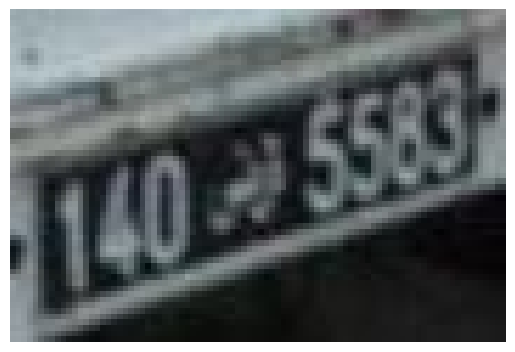

[2024/12/13 16:08:09] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/13 16:08:09] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.06125617027282715
[2024/12/13 16:08:09] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04726886749267578
OCR Text for output_crops/1024_crop_0_lic_plate.jpg: 1405583


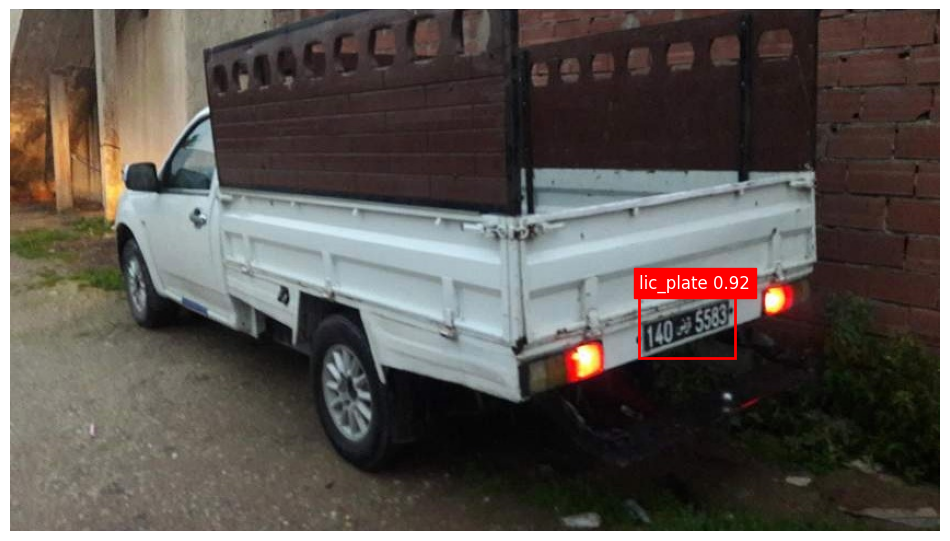

In [91]:
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR

#Comments are Generated By ChatGPT

class LicRecognition:
    def __init__(self, weights_path: str,ocr):
        """
        Initialize the model and OCR.
        Args:
            weights_path (str): Path to the trained YOLOv5 weights file (e.g., best.pt).
        """
        self.model = self.load_model(weights_path)
        self.ocr = ocr

    def load_model(self, weights_path: str):
        """
        Load the YOLOv5 model.
        Args:
            weights_path (str): Path to the trained weights file (e.g., best.pt).
        Returns:
            model: Loaded YOLOv5 model.
        """
        model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path, force_reload=True)
        return model

    def predict(self, image_path: str, conf_thresh: float = 0.25):
        """
        Perform predictions on a single image.
        Args:
            image_path (str): Path to the input image.
            conf_thresh (float): Confidence threshold for predictions.
        Returns:
            results: YOLOv5 predictions.
        """
        # Perform inference
        results = self.model(image_path)
        return results

    def save_cropped_images(self, results, image_path: str, output_dir: str):
        """
        Crop bounding box regions from the image and save them.
        Args:
            results: YOLOv5 prediction results.
            image_path (str): Path to the input image.
            output_dir (str): Directory to save cropped images.
        """
        # Load the original image
        original_image = Image.open(image_path)
        Path(output_dir).mkdir(parents=True, exist_ok=True)
    
        # Extract bounding boxes and crop the image
        df = results.pandas().xyxy[0]  # Get bounding box coordinates
        cropped_paths = []
        for idx, row in df.iterrows():
            x_min, y_min, x_max, y_max = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            label = row['name']  # Class label
    
            # Crop the region
            cropped_image = original_image.crop((x_min, y_min, x_max, y_max))
    
            # Save the cropped region
            output_path = Path(output_dir) / f"{Path(image_path).stem}_crop_{idx}_{label}.jpg"
            cropped_image.save(output_path)
            cropped_paths.append(output_path)
        return cropped_paths
    def display_croped(self,crop_path):
        cropped_image = Image.open(crop_path)
        plt.imshow(cropped_image)
        plt.axis("off")
        plt.show()
    def display_results(self, results, image_path: str):
        """
        Display the original image with bounding boxes overlaid.
        Args:
            results: YOLOv5 prediction results.
            image_path (str): Path to the input image.
        """
        # Load the original image
        original_image = Image.open(image_path).convert("RGB")
    
        # Create a Matplotlib figure
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.imshow(original_image)
    
        # Draw bounding boxes
        df = results.pandas().xyxy[0]
        for _, row in df.iterrows():
            x_min, y_min, x_max, y_max = row['xmin'], row['ymin'], row['xmax'], row['ymax']
            label = row['name']
            confidence = row['confidence']
    
            # Draw rectangle and label
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor="red", facecolor="none", linewidth=2)
            ax.add_patch(rect)
            ax.text(x_min, y_min - 5, f"{label} {confidence:.2f}", color="white", fontsize=12, backgroundcolor="red")
    
        plt.axis("off")
        plt.show()

    def extract_text_from_ocr(self, img_name: str):
        """
        Extract text from an image using OCR.
        Args:
            img_name (str): The name of the image to perform OCR on.
        Returns:
            text: Extracted text from the image.
        """
        try:
            text = ""
            for i in self.ocr.ocr(img_name, det=True, rec=True, cls=True)[0]:
                if i:
                    text += i[1][0]  # Collect text
            return text
        except Exception as e:
            return None

    def pipeline(self, image_path: str, output_dir: str):
        """
        Complete pipeline for model inference, cropping, OCR extraction, and visualization.
        Args:
            image_path (str): Path to the input image.
            output_dir (str): Directory to save cropped images and OCR output.
        """
        # Step 1: Perform YOLOv5 predictions
        predictions = self.predict(image_path)

        # Step 2: Save cropped images based on bounding boxes
        cropped_paths = self.save_cropped_images(predictions, image_path, output_dir)
        print(cropped_paths)
        # Step 3: Extract text from OCR for each cropped image
        for crop_path in cropped_paths:
            self.display_croped(crop_path)
            ocr_text = self.extract_text_from_ocr(str(crop_path))
            print(f"OCR Text for {crop_path}: {ocr_text}")

        # Step 4: Display the original image with bounding boxes
        self.display_results(predictions, image_path)


# Main execution block
if __name__ == "__main__":
    # Step 1: Initialize the LicRecognition class with the model path and OCR settings
    model_path = "yolov5_old/runs/train/exp3/weights/best.pt"  # Replace with your model path
    ocr_model_dir = 'PaddleOCR/output/v3_en_mobile/best_model/'  # Replace with your OCR model path
    ocr_char_dict_path = 'PaddleOCR/dataset/dict.txt'  # Replace with your OCR dictionary path
    lic_recognition = LicRecognition(model_path, ocr)

    # Step 2: Specify the image
    image_path = "data/test/1024.jpg"  # Replace with the image you want to predict

    # Step 3: Specify the directory to save cropped images
    output_directory = "output_crops"  # Directory to save cropped images

    # Step 4: Run the pipeline
    lic_recognition.pipeline(image_path, output_directory)


In [77]:
try:
    text = ""
    for i in self.ocr.ocr("data/test/1003.jpg" , det=True, rec=True, cls=True)[0]:
        if i:
            text += i[1][0]  # Collect text
    print(text)
except Exception as e:
    None

[PosixPath('output_crops/1006_crop_0_lic_plate.jpg')]


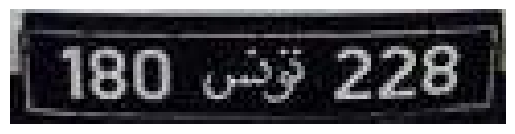

[2024/12/13 16:02:42] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/13 16:02:43] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01584005355834961
[2024/12/13 16:02:43] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04778432846069336
OCR Text for output_crops/1006_crop_0_lic_plate.jpg: 180228


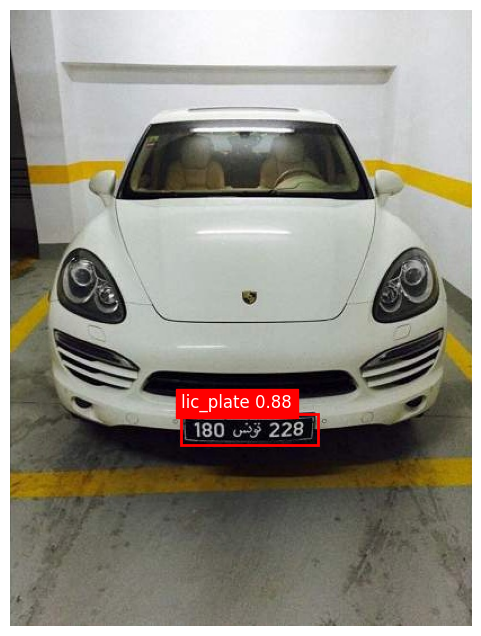

In [73]:
image_path = "data/test/1006.jpg"  
lic_recognition.pipeline(image_path, output_directory)

In [92]:
ocr.ocr("data/test/1006.jpg" , det=True, rec=True, cls=True)

[2024/12/13 16:08:44] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/12/13 16:08:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.06641650199890137
[2024/12/13 16:08:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.04549098014831543


[[[[[165.0, 365.0], [263.0, 365.0], [263.0, 379.0], [165.0, 379.0]],
   ('180228', 0.9933350682258606)]]]

In [ ]:
## thank U Sir 